In [ ]:
## 

In [6]:
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import numpy as np
import folium
import time
from IPython.display import display
%matplotlib inline
matplotlib.style.use('ggplot')

Sunday:
Sundaytest loss:			0.117339932555
Monday:
Mondaytest loss:			0.243365379895
Tuesday:


/Users/XueqiWang/anaconda/lib/python2.7/site-packages/numpy/lib/polynomial.py:594: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)
/Users/XueqiWang/anaconda/lib/python2.7/site-packages/numpy/lib/polynomial.py:594: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)
/Users/XueqiWang/anaconda/lib/python2.7/site-packages/numpy/lib/polynomial.py:594: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)


Tuesdaytest loss:			0.225764012624
Wednesday:
Wednesdaytest loss:			0.235561635359
Thursday:
Thursdaytest loss:			0.14181680426
Friday:
Fridaytest loss:			0.252774563402
Saturday:


/Users/XueqiWang/anaconda/lib/python2.7/site-packages/numpy/lib/polynomial.py:594: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)
/Users/XueqiWang/anaconda/lib/python2.7/site-packages/numpy/lib/polynomial.py:594: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)
/Users/XueqiWang/anaconda/lib/python2.7/site-packages/numpy/lib/polynomial.py:594: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)
/Users/XueqiWang/anaconda/lib/python2.7/site-packages/numpy/lib/polynomial.py:594: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)


Saturdaytest loss:			0.134568341101
Average error on all weekday:			0.193027238456


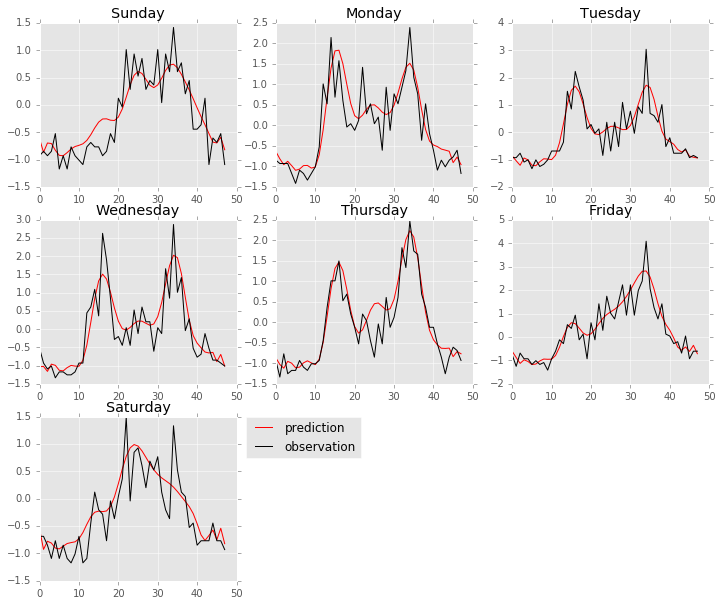

In [16]:
olddata = np.load('data4/num_accident_OH_norm_2009-2015.npy')
week = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
models = []
total_loss = np.zeros(7)
start = 0
nfig = 1
plt.figure(figsize = (12,10))
for wd in range(7):
    # Abstract each weekday data
    print (week[wd] + ':')
    newdata = np.zeros(shape = (336,2))
    i = start
    j = 0
    while j<7:
        newdata[j*48:j*48+48, :] = olddata[i:i+48, -2:]
        j+=1
        i+=336
    npdata = newdata
    x = npdata[0:288, 0]
    y = npdata[0:288, 1]
    z = np.polyfit(x, y, 25)
    fitline = np.poly1d(z)
    models.append(fitline)
    
    plt.subplot(3,3,nfig)
    plt.plot(fitline(npdata[288:336, 0]), color = 'r', label = 'prediction')
    plt.plot(npdata[288:336, -1], color = 'k', label = 'observation')
#     plt.xlabel('time slot')
#     plt.ylabel('number of accident(normalised)')
    plt.title(week[wd])
    # compute test loss
    pre = fitline(npdata[288:336, 0])
    ob = npdata[288:336, -1]
    test_err = (pre - ob)**2
    test_err = np.mean(test_err)
    print ('{}test loss:\t\t\t{}'.format(week[wd], test_err))
    total_loss[wd] = test_err
    start += 48
    nfig += 1

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig('image/polynomial_fit.eps',format="eps",transparent=True, grid = True, bbox_inches='tight', pad_inches=0.1)
print ('Average error on all weekday:\t\t\t{}'.format(total_loss.mean()))

In [ ]:
import time
week = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
nfig = 0
fig, axes = plt.subplots(nrows=3, ncols=3)
for d in week:
    
    month.hist(bins = 24, ax=axes[int(nfig/3), nfig%3], figsize = (10,10),color = '#0072B2')
    axes[int(nfig/3), nfig%3].set_title(week[d])
    nfig+=1